In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import methods

In [4]:
sample_path="tgs_salt/1bd1c8c771.png"
sample_semantic_mask_path="tgs_salt/1bd1c8c771Mask.png"
generat_mask_path="tgs_salt/0bdd44d530Mask.png" 

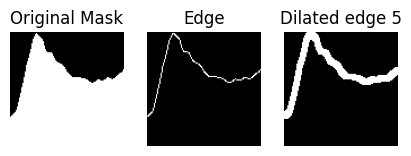

In [14]:
mask = cv2.imread("tgs_salt/1bd1c8c771Mask.png")
mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(mask,100,200)
kernel = np.ones((5,5))
dilated_edge = cv2.dilate(edges, kernel, iterations=1)
# plt imshow 3 columns
plt.figure(figsize=(5,5))
plt.subplot(131),plt.imshow(mask,cmap = 'gray')
plt.title('Original Mask'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.subplot(132),plt.imshow(edges,cmap = 'gray')
plt.title('Edge'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.subplot(133),plt.imshow(dilated_edge,cmap = 'gray')
plt.title('Dilated edge 5'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.show()

In [24]:
import cv2
# Load image as greyscale
im = cv2.imread("tgs_salt/1bd1c8c771Mask.png", cv2.IMREAD_GRAYSCALE)

# Threshold for just the brightest things
_, thr = cv2.threshold(edges, 192,255,type=cv2.THRESH_BINARY)

# Find contours
contours,hierarchy = cv2.findContours(thr, 1, 2)

# Iterate over contours
for cnt in contours:
    # Get area of blob
    area = cv2.contourArea(cnt)
    # Only work with decent size blobs - ignore smallest ones
    if area > 1:
        center, size, angle = cv2.minAreaRect(cnt)
        print(f'Area: {area}, angle: {angle}')

Area: 25.5, angle: 22.833654403686523


In [22]:
# This returns an array of r and theta values
lines = cv2.HoughLines(dilated_edge, 1, np.pi/180, 200)

In [23]:
# The below for loop runs till r and theta values
# are in the range of the 2d array
if lines is not None:
    for r_theta in lines:
        arr = np.array(r_theta[0], dtype=np.float64)
        r, theta = arr
        # Stores the value of cos(theta) in a
        a = np.cos(theta)
    
        # Stores the value of sin(theta) in b
        b = np.sin(theta)
    
        # x0 stores the value rcos(theta)
        x0 = a*r
    
        # y0 stores the value rsin(theta)
        y0 = b*r
    
        # x1 stores the rounded off value of (rcos(theta)-1000sin(theta))
        x1 = int(x0 + 1000*(-b))
    
        # y1 stores the rounded off value of (rsin(theta)+1000cos(theta))
        y1 = int(y0 + 1000*(a))
    
        # x2 stores the rounded off value of (rcos(theta)+1000sin(theta))
        x2 = int(x0 - 1000*(-b))
    
        # y2 stores the rounded off value of (rsin(theta)-1000cos(theta))
        y2 = int(y0 - 1000*(a))
    
        # cv2.line draws a line in img from the point(x1,y1) to (x2,y2).
        # (0,0,255) denotes the colour of the line to be
        # drawn. In this case, it is red.
        cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)
    
    # All the changes made in the input image are finally
    # written on a new image houghlines.jpg
    cv2.imwrite('linesDetected.jpg', img)

In [28]:
# Python program to illustrate HoughLine
# method for line detection
import cv2
import numpy as np
 
# Reading the required image in
# which operations are to be done.
# Make sure that the image is in the same
# directory in which this python program is
img = cv2.imread('examples\wood.jpg')
 
# Convert the img to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
 
# Apply edge detection method on the image
edges = cv2.Canny(gray, 50, 150, apertureSize=3)
 
# This returns an array of r and theta values
lines = cv2.HoughLines(edges, 1, np.pi/180, 200)

# cv2.HoughLines


 
# The below for loop runs till r and theta values
# are in the range of the 2d array
for r_theta in lines:
    arr = np.array(r_theta[0], dtype=np.float64)
    r, theta = arr
    # Stores the value of cos(theta) in a
    a = np.cos(theta)
 
    # Stores the value of sin(theta) in b
    b = np.sin(theta)
 
    # x0 stores the value rcos(theta)
    x0 = a*r
 
    # y0 stores the value rsin(theta)
    y0 = b*r
 
    # x1 stores the rounded off value of (rcos(theta)-1000sin(theta))
    x1 = int(x0 + 1000*(-b))
 
    # y1 stores the rounded off value of (rsin(theta)+1000cos(theta))
    y1 = int(y0 + 1000*(a))
 
    # x2 stores the rounded off value of (rcos(theta)+1000sin(theta))
    x2 = int(x0 - 1000*(-b))
 
    # y2 stores the rounded off value of (rsin(theta)-1000cos(theta))
    y2 = int(y0 - 1000*(a))
 
    # cv2.line draws a line in img from the point(x1,y1) to (x2,y2).
    # (0,0,255) denotes the colour of the line to be
    # drawn. In this case, it is red.
    cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)
 
# All the changes made in the input image are finally
# written on a new image houghlines.jpg
cv2.imwrite('linesDetected.jpg', img)

KeyboardInterrupt: 